In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

In [2]:
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets, relu

In [3]:
x, y = load_planar_dataset()

In [4]:
y.shape[0]

1

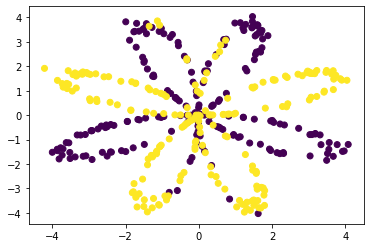

In [5]:
plt.scatter(x[0, :], x[1, :], c=y[0]);

In [6]:
shape_x = x.shape
shape_y = y.shape
m = x.shape[1]

print(f'Shape of x : {shape_x}')
print(f'Shape of y : {shape_y}')
print(f'Number of training exmaples : {m}')

Shape of x : (2, 400)
Shape of y : (1, 400)
Number of training exmaples : 400


In [7]:
scores = {}

# Using Logistic Regression

In [8]:
cf = sklearn.linear_model.LogisticRegressionCV();
cf.fit(x.T, y.T);

c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
y_hat = cf.predict(x.T)

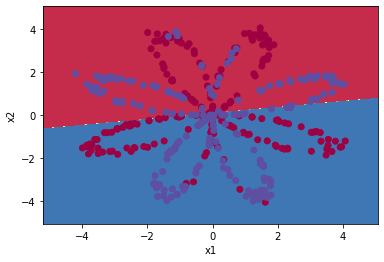

In [10]:
plot_decision_boundary(lambda x: cf.predict(x), x, y[0])

In [11]:
from sklearn.metrics import f1_score
lr_acc = f1_score(y.T, y_hat)
lr_acc

0.4903846153846154

In [12]:
scores['Logistic Regression accuracy'] = lr_acc

# Using Neural Networks

In [13]:
def layer_size(x, y):
    n_x = x.shape[0]
    n_y = y.shape[0]
#     n_h = 10
    return(n_x, n_y)

In [14]:
def initialize(n_x, n_h, n_y):
    np.random.seed(2)
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    }
    
    return parameters

In [15]:
def forward_prop(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = w1 @ x + b1
    a1 = relu(z1)
    z2 = w2 @ a1 + b2
    a2 = sigmoid(z2)
    
    cache = {
        'z1' : z1,
        'a1' : a1,
        'z2' : z2,
        'a2' : a2    
    }
    return a2, cache

In [16]:
def compute_cost(a2, y, parameters):
    m = y.shape[1]
    logprobs = y * np.log(a2) + (1-y) * np.log(1-a2)
    cost = -1/m * np.sum(logprobs)
    cost = float(np.squeeze(cost))
    return cost

In [17]:
def backward_prop(parameters, cache, x, y):
    m = x.shape[1]
    w1 = parameters['w1']
    w2 = parameters['w2']
    a1 = cache['a1']
    a2 = cache['a2']
    
    dz2 = a2 - y
    dw2 = 1/m * dz2 @ a1.T
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T @ dz2 * (1-a1**2)
    dw1 = 1/m * dz1 @ x.T
    db1 = 1/m * np.sum(dz1, axis = 1, keepdims = True)
    
    grads = {
        'dw1' : dw1,
        'db1' : db1,
        'dw2' : dw2,
        'db2' : db2
    }
    return grads

In [18]:
def gradient_des(parameters, grads, lr = 1.2):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']
    
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    
    parameters = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    } 
    
    return parameters

In [19]:
def nn_model(x, y, n_h, num_iter):
    np.random.seed(3)
    n_x = layer_size(x, y)[0]
    n_y = layer_size(x, y)[1]
    
    parameters = initialize(n_x, n_h, n_y)
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    for i in range(0, num_iter):
        a2, cache = forward_prop(x, parameters)
        
        cost = compute_cost(a2, y, parameters)
        
        grads = backward_prop(parameters, cache, x, y)
        
        parameters = gradient_des(parameters, grads)
        
        if i % 1000 == 0:
            print("cost after iteration %i: %f" %(i, cost))
            
    return parameters

In [20]:
def predict(parameters, x):
    a2, cache = forward_prop(x, parameters)
    predictions = (a2 > 0.5) * 1
    return predictions[0]

In [21]:
parameters = nn_model(x, y, n_h = 4, num_iter = 9000)

cost after iteration 0: 0.693048
cost after iteration 1000: 0.288083
cost after iteration 2000: 0.254385
cost after iteration 3000: 0.233864
cost after iteration 4000: 0.226792
cost after iteration 5000: 0.222644
cost after iteration 6000: 0.219731
cost after iteration 7000: 0.217504
cost after iteration 8000: 0.219452


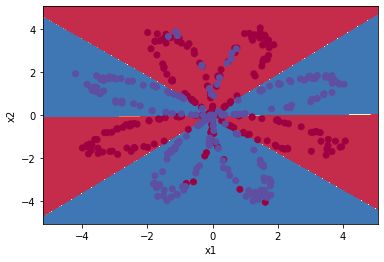

In [22]:
plot_decision_boundary(lambda x: predict(parameters, x.T), x, y[0])

In [27]:
predictions = predict(parameters, x)
nn_acc = f1_score(y.T, predictions)
nn_acc

0.9068627450980392

In [24]:
scores['Neural Network with 1 hidden layers of size 4'] = nn_acc

In [25]:
scores

{'Logistic Regression accuracy': 0.4903846153846154,
 'Neural Network with 1 hidden layers of size 4': 0.9068627450980392}